# Police stop in Rhode Island

On a typical day in the United States, police officers make more than 50,000 traffic stops. Our team is gathering, analyzing, and releasing records from millions of traffic stops by law enforcement agencies across the country. Our goal is to help researchers, journalists, and policymakers investigate and improve interactions between police and the public

the Stanford Open Policing Project dataset and analyze the impact of gender and race on police behavior

cradit https://openpolicing.stanford.edu/

population:
https://datacommons.org/tools/timeline#place=geoId%2F44&statsVar=Count_Person_BlackOrAfricanAmericanAlone%2C0%2C14%2C2%2CCount_Person__Count_Person_HispanicOrLatino%2C0%2C14%2C3%2CCount_Person__Count_Person_WhiteAlone%2C0%2C14%2C7%2CCount_Person__Count_Person_AsianAlone%2C0%2C14%2C1__Count_Person_SomeOtherRaceAlone%2C0%2C14%2C5%2CCount_Person__Count_Person_NativeHawaiianOrOtherPacificIslanderAlone%2C0%2C14%2C4


![image.png](attachment:image.png)

## Problem 
### Do police bias with black and Hispanic drivers and searched more often than whites?
### Are traffic stops prone to racial bias?
<br>
เนื่องจากการปฏิบัติงานของเจ้าหน้าที่ตำรวจในอเมริกานั้น ต้อง interact กับ ผู้คนหลายเชื้อชาติ หลายกลุ่มชาติพันธุ์ ซึ่งทำให้เกิด bias ขึ้นระหว่างทำหน้าที่โดยไม่รู้ตัว dataset นี่เป็นการศึกษา ของ Stanford ที่ต้องการจะ improve interactions between police and the public เราจึ่งมาวิเคราะห์กันว่าจะได้อะไรกันบ้างจากชุดข้อมูลนี้





### <b>คำถามที่จะต้องการหา</b>


<br>
1.คนส่วนใหญ่โดนเรียกด้วยสาเหตุอะไร<br>
2.คนที่โดนตำรวจเรียก มีใครบ้าง ผู้หญิ่งผู้ชาย คนผิวขาว ผิวดำ เชื้อชาติอะไรบ้าง กลุ่มไหนเป็นเท่าไหร่<br>
3.คนที่โดนตำรวจเรียก โดนค้นตัว ค้นรถ หรือไม่ มีแนวโน้มว่า gender or race ใดไหมที่โดนมากกว่าปกติ หา bias<br>
4.มีความเชื่อมโยงหรือไม่ระหว่าง race กับการ โดนจับในที่สุด<br>
5.มีความเชื่อมโยงหรือไม่ระหว่าง race กับการ ค้นหาเจอของผิด กฏหมาย



In [ ]:
# Examining the dataset
import missingno as msno 
import pandas as pd

# Read 'police.csv' into a DataFrame named ri
ri_2020 = pd.read_csv('dataset/ri_statewide_2020_04_01.csv', dtype={'frisk_performed':'float'}, low_memory=False)

ri_2020.head()

,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,...,reason_for_stop,vehicle_make,vehicle_model,raw_BasisForStop,raw_OperatorRace,raw_OperatorSex,raw_ResultOfStop,raw_SearchResultOne,raw_SearchResultTwo,raw_SearchResultThree
0,1,2005-11-22,11:15:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
1,2,2005-10-01,12:20:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
2,3,2005-10-01,12:30:00,X3,white,female,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,F,M,NaN,NaN,NaN
3,4,2005-10-01,12:50:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
4,5,2005-10-01,13:10:00,X3,white,female,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,F,M,NaN,NaN,NaN


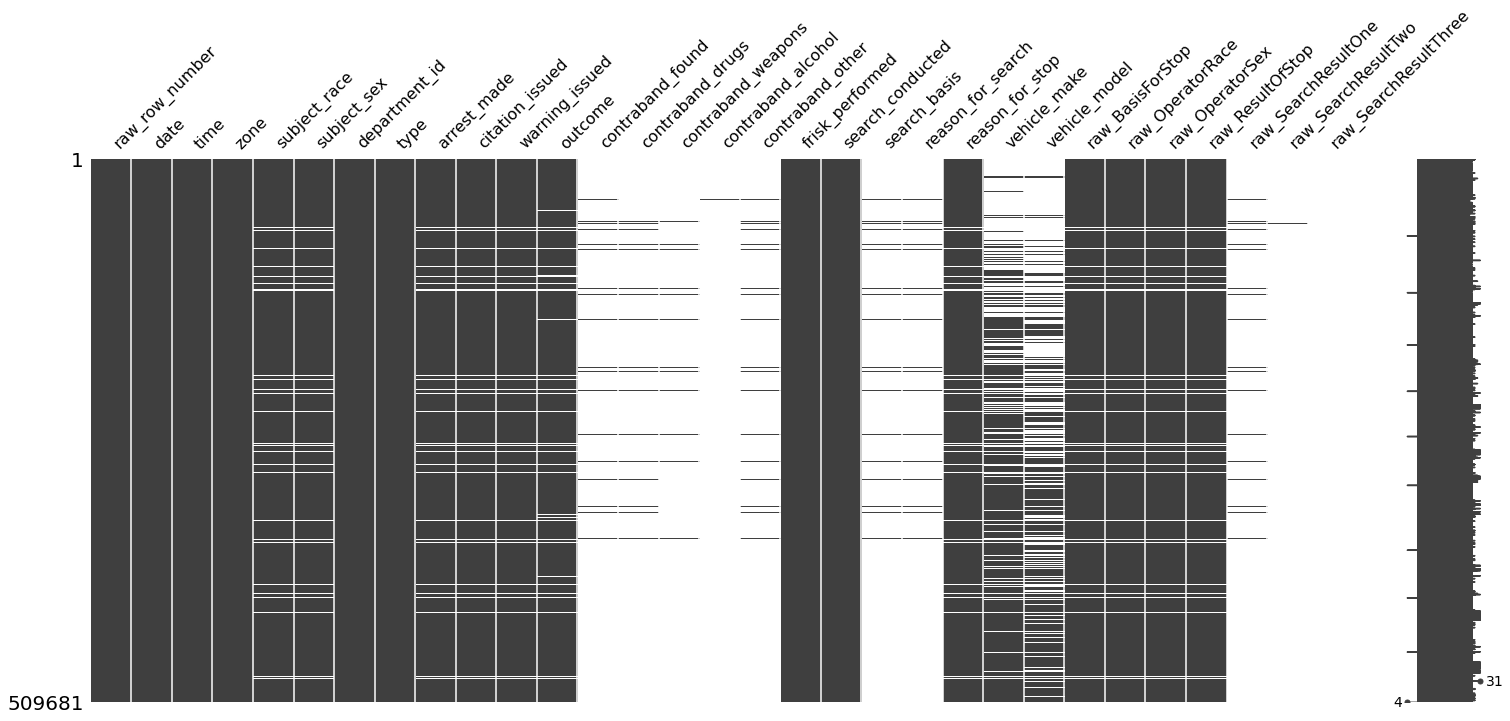

In [ ]:
msno.matrix(ri_2020)

In [ ]:
ri_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509681 entries, 0 to 509680
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   raw_row_number         509681 non-null  int64  
 1   date                   509671 non-null  object 
 2   time                   509671 non-null  object 
 3   zone                   509671 non-null  object 
 4   subject_race           480608 non-null  object 
 5   subject_sex            480584 non-null  object 
 6   department_id          509671 non-null  object 
 7   type                   509681 non-null  object 
 8   arrest_made            480608 non-null  object 
 9   citation_issued        480608 non-null  object 
 10  warning_issued         480608 non-null  object 
 11  outcome                473840 non-null  object 
 12  contraband_found       17762 non-null   object 
 13  contraband_drugs       15988 non-null   object 
 14  contraband_weapons     11795 non-nul

In [ ]:
ri_2020.frisk_performed.value_counts()

0.0    500349
1.0      9332
Name: frisk_performed, dtype: int64

In [ ]:
ri_2020.search_basis.value_counts()

other             9035
probable cause    7767
plain view         960
Name: search_basis, dtype: int64

In [ ]:
ri_2020.columns

Index(['raw_row_number', 'date', 'time', 'zone', 'subject_race', 'subject_sex',
       'department_id', 'type', 'arrest_made', 'citation_issued',
       'warning_issued', 'outcome', 'contraband_found', 'contraband_drugs',
       'contraband_weapons', 'contraband_alcohol', 'contraband_other',
       'frisk_performed', 'search_conducted', 'search_basis',
       'reason_for_search', 'reason_for_stop', 'vehicle_make', 'vehicle_model',
       'raw_BasisForStop', 'raw_OperatorRace', 'raw_OperatorSex',
       'raw_ResultOfStop', 'raw_SearchResultOne', 'raw_SearchResultTwo',
       'raw_SearchResultThree'],
      dtype='object')

In [ ]:
# see rough detail with in column

for i in ri_2020.columns:
    if i != 'raw_row_number' and i != 'date' and i != 'time' and i != 'department_id' and i != 'vehicle_make' and i != 'vehicle_model' and i != 'raw_BasisForStop'and i != 'raw_SearchResultOne' and i != 'raw_SearchResultTwo' and i != 'raw_SearchResultThree':
        print(ri_2020[i].value_counts())

X4    135349
K3    113784
K2    101403
X3     94058
K1     48362
X1     16715
Name: zone, dtype: int64
white                     344734
black                      68579
hispanic                   53125
asian/pacific islander     12826
other                       1344
Name: subject_race, dtype: int64
male      349446
female    131138
Name: subject_sex, dtype: int64
vehicular    509681
Name: type, dtype: int64
False    464005
True      16603
Name: arrest_made, dtype: int64
True     428388
False     52220
Name: citation_issued, dtype: int64
False    451759
True      28849
Name: warning_issued, dtype: int64
citation    428388
warning      28849
arrest       16603
Name: outcome, dtype: int64
False    11183
True      6579
Name: contraband_found, dtype: int64
False    11223
True      4765
Name: contraband_drugs, dtype: int64
False    11296
True       499
Name: contraband_weapons, dtype: int64
True     1120
False      97
Name: contraband_alcohol, dtype: int64
False    16771
True       991
Name

In [ ]:
#cut down the table only interest column

ri_trim = ri_2020[['raw_row_number', 'date', 'time','zone', 'subject_race', 'subject_sex',
       'arrest_made', 'citation_issued', 'warning_issued', 'contraband_found', 'contraband_drugs',
       'contraband_weapons', 'contraband_alcohol', 'frisk_performed',
       'search_conducted', 'reason_for_stop']]

#rename column
ri_trim = ri_trim.rename(columns={"time": "stop_time", "zone": "district"})
print(ri_trim.shape)
ri_trim.head()

(509681, 16)


,raw_row_number,date,stop_time,district,subject_race,subject_sex,arrest_made,citation_issued,warning_issued,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,frisk_performed,search_conducted,reason_for_stop
0,1,2005-11-22,11:15:00,X3,white,male,False,True,False,NaN,NaN,NaN,NaN,0.0,False,Speeding
1,2,2005-10-01,12:20:00,X3,white,male,False,True,False,NaN,NaN,NaN,NaN,0.0,False,Speeding
2,3,2005-10-01,12:30:00,X3,white,female,False,True,False,NaN,NaN,NaN,NaN,0.0,False,Speeding
3,4,2005-10-01,12:50:00,X3,white,male,False,True,False,NaN,NaN,NaN,NaN,0.0,False,Speeding
4,5,2005-10-01,13:10:00,X3,white,female,False,True,False,NaN,NaN,NaN,NaN,0.0,False,Speeding


In [ ]:
ri_trim.info()
ri_trim.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509681 entries, 0 to 509680
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   raw_row_number      509681 non-null  int64  
 1   date                509671 non-null  object 
 2   stop_time           509671 non-null  object 
 3   district            509671 non-null  object 
 4   subject_race        480608 non-null  object 
 5   subject_sex         480584 non-null  object 
 6   arrest_made         480608 non-null  object 
 7   citation_issued     480608 non-null  object 
 8   warning_issued      480608 non-null  object 
 9   contraband_found    17762 non-null   object 
 10  contraband_drugs    15988 non-null   object 
 11  contraband_weapons  11795 non-null   object 
 12  contraband_alcohol  1217 non-null    object 
 13  frisk_performed     509681 non-null  float64
 14  search_conducted    509681 non-null  bool   
 15  reason_for_stop     480608 non-nul

,raw_row_number,date,stop_time,district,subject_race,subject_sex,arrest_made,citation_issued,warning_issued,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,frisk_performed,search_conducted,reason_for_stop
0,1,2005-11-22,11:15:00,X3,white,male,False,True,False,NaN,NaN,NaN,NaN,0.0,False,Speeding
1,2,2005-10-01,12:20:00,X3,white,male,False,True,False,NaN,NaN,NaN,NaN,0.0,False,Speeding
2,3,2005-10-01,12:30:00,X3,white,female,False,True,False,NaN,NaN,NaN,NaN,0.0,False,Speeding
3,4,2005-10-01,12:50:00,X3,white,male,False,True,False,NaN,NaN,NaN,NaN,0.0,False,Speeding
4,5,2005-10-01,13:10:00,X3,white,female,False,True,False,NaN,NaN,NaN,NaN,0.0,False,Speeding


In [ ]:
ri_trim.columns

Index(['raw_row_number', 'date', 'stop_time', 'district', 'subject_race',
       'subject_sex', 'arrest_made', 'citation_issued', 'warning_issued',
       'contraband_found', 'contraband_drugs', 'contraband_weapons',
       'contraband_alcohol', 'frisk_performed', 'search_conducted',
       'reason_for_stop'],
      dtype='object')

In [ ]:
ri_trim.to_csv('PoliceRI2020.csv')